## Adagrad Optimizer
### Adagrad - adaptive gradient
#### Here as the epochs increase we change the learning rate lead to the defination of ada grad i.e adaptive gradient descent
#### This is the best optimizer when we have sparse data i.e more number of zeros as compared to the datapoints and if the features have differrent scale
#### This also work with the same gradient updation formula as mentioned in the batch gradient descent just here change is that the learning rate is divided by np.sqrt(v(t) + E)
#### Where the v(t) = v(t-1) + (gradient)^2
#### Here all the gradients square is added lead to getting the record of the past gradients and and the E - just an constant that dosent take the denominator to zero
#### If the gradient is high then the learning rate is divided by the big value lead to very small updation hence the other axis the work also takes place
#### IF the gradient is low then the learning rate is divided by the small value lead to small updation in that axis
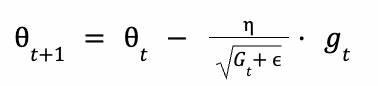

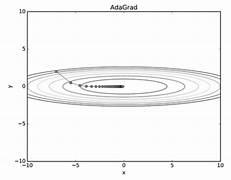

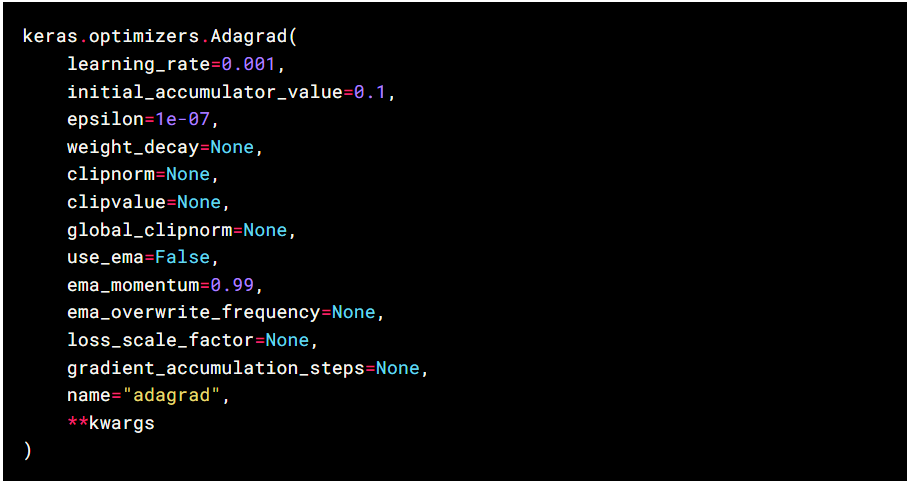

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adagrad

In [2]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.2515)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
### building the model
model = Sequential([
    Dense(10,activation='relu',input_dim=2),
    Dense(5,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


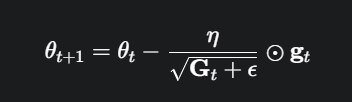

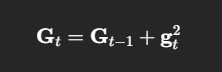

In [5]:
### Compiling the model
adagrad = Adagrad(
    learning_rate = 0.01, ## learning rate (lr)
    epsilon = 1e-7, ##eposilon (E)
    initial_accumulator_value = 0.1 ## The value of  theta(t) i.e theta(0)
)
model.compile(optimizer=adagrad,loss='binary_crossentropy')

In [6]:
history = model.fit(
    X_train,y_train,
    epochs=100
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.6890
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6864 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6829 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6817
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6776
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6771
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6755
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6718
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6736
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6732
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6700
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6641
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6662
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6625
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6640
Epoch 16/100
3/3

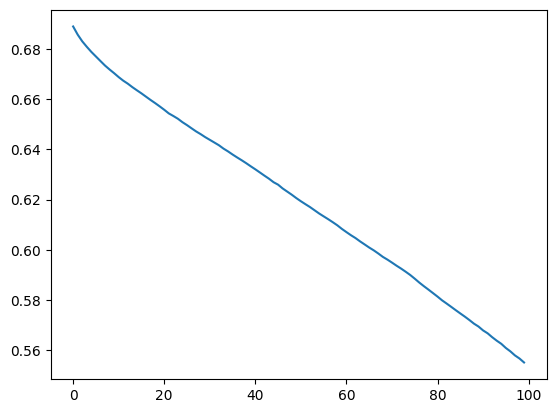

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

### The biggest disadvantage of the adagrad is that it reach to the global minimum in best path but it dosen't reach to the correct global minimum it reach to near by not douwn because the v(t) become very large when the number of epochs reached and lead to the learrning rate very small and thus it lead to no update of weights of weights in down side